<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/hierarchical_clustering_client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [53]:
# Generate synthetic data that is more easily clusterable
X, _ = make_blobs(n_samples=800, centers=4, cluster_std=1.5, n_features=2, random_state=42)


# Create a DataFrame from the synthetic data
clients = pd.DataFrame(X, columns=['Frequency', 'Amount'])


# Visualisation du DataFrame pour s'assurer que les données sont générées correctement
clients.head()

,Frequency,Amount
0,-9.420593,7.579147
1,-6.054549,-8.332626
2,3.454167,2.680372
3,3.583363,-0.139522
4,5.479565,3.594341


In [12]:
# Perform hierarchical clustering
Z = linkage(X, method="ward")

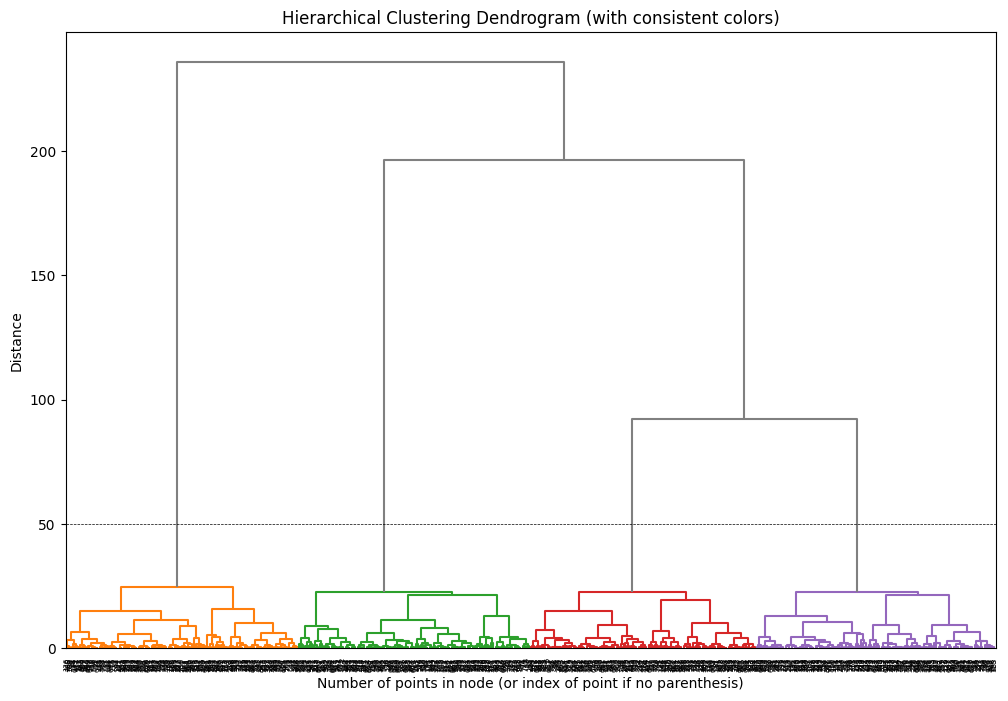

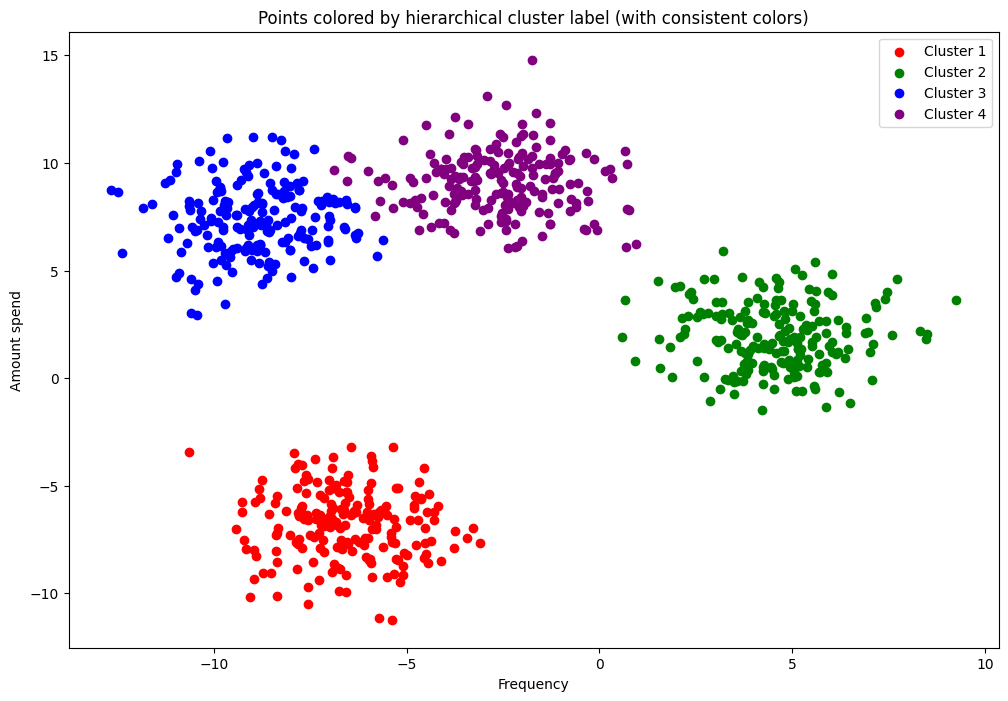

In [52]:

# Let's find the height at which the last four clusters merge
# This is the height we will use to draw a more accurate horizontal line for 't'
last_4_merge_height = 50

# Generate the clusters with the adjusted 't' value
adjusted_clusters = fcluster(Z, last_4_merge_height, criterion='distance')

# Define a consistent color palette
color_palette = {1: 'red', 2: 'green', 3: 'blue', 4: 'purple', 5: 'orange', 6: 'pink'}

# Create a color mapping for the clusters
cluster_colors = [color_palette[label] for label in adjusted_clusters]

# Plot the dendrogram with consistent colors
plt.figure(figsize=(12, 8))
dendrogram(Z, color_threshold=last_4_merge_height, above_threshold_color='grey')
plt.title("Hierarchical Clustering Dendrogram (with consistent colors)")
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.ylabel("Distance")
plt.axhline(y=last_4_merge_height, c='black', ls='--', lw=0.5)
plt.show()

# Plot the scatter plot with consistent colors
plt.figure(figsize=(12, 8))
for cluster_label in np.unique(adjusted_clusters):
    # Select only data points with the current cluster label for plotting
    plt.scatter(X[adjusted_clusters == cluster_label, 0], X[adjusted_clusters == cluster_label, 1],
                c=color_palette[cluster_label], label=f'Cluster {cluster_label}')
plt.title("Points colored by hierarchical cluster label (with consistent colors)")
plt.xlabel("Frequency")
plt.ylabel("Amount spend")
plt.legend()
plt.show()

In [58]:
# Calculate Silhouette Coefficient
silhouette_avg = silhouette_score(clients[['Frequency', 'Amount']], adjusted_clusters)

# Calculate Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(clients[['Frequency', 'Amount']], adjusted_clusters)

# Le Silhouette Coefficient varie de -1 à +1. Une valeur élevée indique que les objets sont bien groupés et séparés des autres groupes
# Calinski-Harabasz Index, une valeur plus élevée est préférable. Elle indique des clusters plus denses et mieux séparés.
(silhouette_avg, calinski_harabasz_avg)

(0.6825791146233218, 3861.046403902617)

# Client Clustering Analysis

The scatter plot represents a clustering analysis of client data. Each cluster is identified by different colors and is plotted based on two dimensions: 'Frequency' of purchases and 'Amount Spent'.

## Analysis of Each Cluster

### Cluster 1 (Red)
- **Location**: Lower left of the plot.
- **Characteristics**: Clients with low purchase frequency and low amount spent.
- **Interpretation**: These are occasional shoppers who spend little.

### Cluster 2 (Blue)
- **Location**: Middle-left part of the plot.
- **Characteristics**: Clients with high purchase frequency but moderate amount spent.
- **Interpretation**: These are regular customers who make moderate purchases.

### Cluster 3 (Purple)
- **Location**: Upper-middle area of the plot.
- **Characteristics**: Clients with moderate to high purchase frequency and moderate to high amount spent.
- **Interpretation**: These clients are likely loyal customers who spend well.

### Cluster 4 (Green)
- **Location**: Upper right of the plot.
- **Characteristics**: Clients with high purchase frequency and low amount spent.
- **Interpretation**: These are loyal shoppers who spend moderate amount.

## Implications for Marketing Strategy

- **Cluster 1**: Implement special promotions to increase their purchase frequency and amount spent.
- **Cluster 2 & 3 & 4**: Develop loyalty programs to maintain and enhance their shopping behavior.


